In [1]:
%matplotlib inline

In [2]:
# -*- coding: utf-8 -*-
"""
@author: Hiromasa Kaneko
課題9: logSdataset1290.csvを読み込み、オートスケーリングしてからlogSと構造記述子との間で最小二乗法による重回帰分析を行え。
計算できない場合は、その原因について調べて対処法を実行せよ。r2の計算、logSの実測値と計算値とのプロット、標準回帰係数の
standard_regression_coefficients.csvへの保存を実施せよ。

課題10: logSdataset1290.csvを読み込み、オートスケーリングしてからlogSと構造記述子との間でPLSを行え。成分数は2とする。
r2の計算、logSの実測値と計算値とのプロット、標準回帰係数のstandard_regression_coefficients.csvへの保存を実施せよ。
課題9の結果と比較して考察せよ

課題11: logSdataset1290.csvを読み込み、オートスケーリングしてからlogSと構造記述子との間でPLSを行え。50成分までの
成分数ごとのr2・r2cvのプロット、最適成分数におけるlogSの実測値と計算値とのプロットおよびlogSの実測値と
クロスバリデーション推定値とのプロットを作成せよ。クロスバリデーションは2-fold クロスバリデーションとし、
最適成分数はr2CVが最大のものとする。

課題12: 課題11で50成分までにr2cvの値が小さい(たとえば負の値になる)ことがあるときはその原因を調べて対応し、
r2cvを向上させよ。ただし、化合物は削除しないこととする。
"""

import matplotlib.figure as figure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression

#regression_method_flag = 3  # 1:OLS, 2:PLS(constant component number), 3:PLS,
pls_component_number = 2
max_pls_component_number = 50
fold_number = 5
threshold_of_rate_of_same_value = 0.79
do_autoscaling = True  # True or False

# load data set
raw_data_with_y = pd.read_csv('logSdataset1290.csv', encoding='SHIFT-JIS', index_col=0)

raw_data_with_y = raw_data_with_y.loc[:, raw_data_with_y.mean().index]  # 平均を計算できる変数だけ選択

# raw_data_with_y = raw_data_with_y.loc[raw_data_with_y.mean(axis=1).index,:] #平均を計算できるサンプルだけ選択

raw_data_with_y = raw_data_with_y.replace(np.inf, np.nan).fillna(np.nan)  # infをnanに置き換えておく

raw_data_with_y = raw_data_with_y.dropna(axis=1)  # nanのある変数を削除

# raw_data_with_y = raw_data_with_y.dropna() #nanのあるサンプルを削除

# logSdataset1290.csv用 変数選択により精度向上
# raw_data_with_y = raw_data_with_y.drop(['Ipc','Kappa3'],axis=1) #Ipc:1139だけ外れ値をもつ記述子、Kappa3:889だけ外れ値をもつ記述子

# delete duplicates
# raw_data_with_y = raw_data_with_y.loc[~raw_data_with_y.index.duplicated(keep='first'),:] #重複したサンプルの最初を残す
# raw_data_with_y = raw_data_with_y.loc[~raw_data_with_y.index.duplicated(keep='last'),:] #重複したサンプルの最後を残す

raw_data_with_y = raw_data_with_y.loc[~raw_data_with_y.index.duplicated(keep=False), :]  # 重複したサンプルはすべて削除

y = raw_data_with_y[raw_data_with_y.columns[0]]  #ｙとして1列目を指定

rawX = raw_data_with_y[raw_data_with_y.columns[1:]]  #変数は2列目以降

rawX_tmp = rawX.copy()  #Copyをとっておく

# delete descriptors with high rate of the same values...threshold_of_rate_of_same_value = 0.79
rate_of_same_value = list()
num = 0

for X_variable_name in rawX.columns:
    num += 1
    print('{0} / {1}'.format(num, rawX.shape[1]))
    same_value_number = rawX[X_variable_name].value_counts()
    rate_of_same_value.append(float(same_value_number[same_value_number.index[0]] / rawX.shape[0]))
deleting_variable_numbers = np.where(np.array(rate_of_same_value) >= threshold_of_rate_of_same_value)

"""
# delete descriptors with zero variance
deleting_variable_numbers = np.where( rawX.var() == 0 )
"""

if len(deleting_variable_numbers[0]) == 0:
    X = rawX
else:
    X = rawX.drop(rawX.columns[deleting_variable_numbers], axis=1)
    print('Variable numbers zero variance: {0}'.format(deleting_variable_numbers[0] + 1))

print('# of X-variables: {0}'.format(X.shape[1]))



1 / 196
2 / 196
3 / 196
4 / 196
5 / 196
6 / 196
7 / 196
8 / 196
9 / 196
10 / 196
11 / 196
12 / 196
13 / 196
14 / 196
15 / 196
16 / 196
17 / 196
18 / 196
19 / 196
20 / 196
21 / 196
22 / 196
23 / 196
24 / 196
25 / 196
26 / 196
27 / 196
28 / 196
29 / 196
30 / 196
31 / 196
32 / 196
33 / 196
34 / 196
35 / 196
36 / 196
37 / 196
38 / 196
39 / 196
40 / 196
41 / 196
42 / 196
43 / 196
44 / 196
45 / 196
46 / 196
47 / 196
48 / 196
49 / 196
50 / 196
51 / 196
52 / 196
53 / 196
54 / 196
55 / 196
56 / 196
57 / 196
58 / 196
59 / 196
60 / 196
61 / 196
62 / 196
63 / 196
64 / 196
65 / 196
66 / 196
67 / 196
68 / 196
69 / 196
70 / 196
71 / 196
72 / 196
73 / 196
74 / 196
75 / 196
76 / 196
77 / 196
78 / 196
79 / 196
80 / 196
81 / 196
82 / 196
83 / 196
84 / 196
85 / 196
86 / 196
87 / 196
88 / 196
89 / 196
90 / 196
91 / 196
92 / 196
93 / 196
94 / 196
95 / 196
96 / 196
97 / 196
98 / 196
99 / 196
100 / 196
101 / 196
102 / 196
103 / 196
104 / 196
105 / 196
106 / 196
107 / 196
108 / 196
109 / 196
110 / 196
111 / 19

In [3]:
# autoscaling　正規化  Z変換
if do_autoscaling:
    autoscaled_X = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)# N-1で割り算する デフォルトddof=1なので表記しなくてもよい
    autoscaled_y = (y - y.mean()) / y.std(ddof=1)
else:
    autoscaled_X = X
    autoscaled_y = y

In [4]:
autoscaled_X.head()

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,MaxEStateIndex,MinEStateIndex,...,NumRotatableBonds,RingCount,MolLogP,MolMR,fr_C_O,fr_C_O_noCOO,fr_NH0,fr_benzene,fr_bicyclic,fr_halogen
CC(N)=O,-1.462269,-1.434709,-1.462549,-1.396180,0.270119,-0.268989,0.239969,0.294365,0.233396,-0.043404,...,-0.925981,-1.088071,-1.563766,-1.594562,0.568142,0.726245,-0.495586,-0.87314,-0.4055,-0.472719
CNN,-1.599501,-1.587516,-1.600096,-1.517749,-1.342618,0.387459,-0.423269,-1.420479,-1.117748,1.475921,...,-0.925981,-1.088071,-1.796634,-1.663571,-0.684129,-0.571421,-0.495586,-0.87314,-0.4055,-0.472719
CC(=O)O,-1.451878,-1.412971,-1.452124,-1.396180,0.912882,-1.014440,0.993131,0.988940,0.168476,-0.425891,...,-0.925981,-1.088071,-1.225116,-1.660902,0.568142,-0.571421,-0.495586,-0.87314,-0.4055,-0.472719
C1CCNC1,-1.334965,-1.347158,-1.335040,-1.213827,-1.365966,0.086578,-0.119275,-1.395249,-1.519439,1.167806,...,-0.925981,-0.288185,-1.067516,-1.286599,-0.684129,-0.571421,-0.495586,-0.87314,-0.4055,-0.472719
NC(=O)NO,-1.282882,-1.238339,-1.282561,-1.213827,1.180079,-0.135096,0.104691,1.277675,0.235425,-0.507347,...,-0.925981,-1.088071,-1.816751,-1.610004,0.568142,0.726245,-0.495586,-0.87314,-0.4055,-0.472719


In [5]:
#regression_method_flag == 1:  # Ordinary Least Squares
regression_model = LinearRegression()

regression_model.fit(autoscaled_X, autoscaled_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
# calculate y
calculated_y = np.ndarray.flatten(regression_model.predict(autoscaled_X))
estimated_y = np.ndarray.flatten(
    model_selection.cross_val_predict(regression_model, autoscaled_X, autoscaled_y, cv=fold_number))

if do_autoscaling:
    calculated_y = calculated_y * y.std(ddof=1) + y.mean()
    estimated_y = estimated_y * y.std(ddof=1) + y.mean()

# r2
print('r2: {0}'.format(float(1 - sum((y - calculated_y) ** 2) / sum((y - y.mean()) ** 2))))


r2: 0.9173793276849627


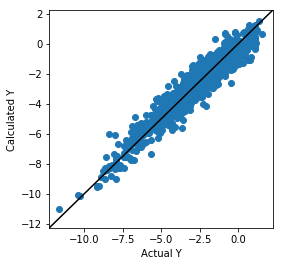

In [7]:
# yy-plot
plt.figure(figsize=figure.figaspect(1))
plt.scatter(y, calculated_y)
YMax = np.max(np.array([np.array(y), calculated_y]))
YMin = np.min(np.array([np.array(y), calculated_y]))
plt.plot([YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)],
         [YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)], 'k-')
plt.ylim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlabel('Actual Y')
plt.ylabel('Calculated Y')
plt.show()


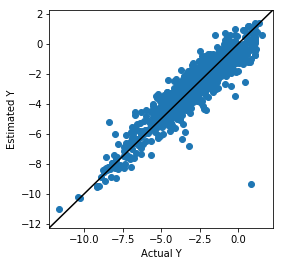

In [8]:
plt.figure(figsize=figure.figaspect(1))

plt.scatter(y, estimated_y)

YMax = np.max(np.array([np.array(y), estimated_y]))
YMin = np.min(np.array([np.array(y), estimated_y]))
plt.plot([YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)],
         [YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)], 'k-')

plt.ylim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlabel('Actual Y')
plt.ylabel('Estimated Y')
plt.show()


In [9]:
# standard regression coefficients
standard_regression_coefficients = regression_model.coef_
standard_regression_coefficients = pd.DataFrame(standard_regression_coefficients)
standard_regression_coefficients.index = X.columns
standard_regression_coefficients.columns = ['standard regression coefficient']
standard_regression_coefficients.to_csv('OLS_standard_regression_coefficients.csv')


In [10]:
#regression_method_flag == 2:  # Partial Least Squares with constant component
regression_model = PLSRegression(n_components=pls_component_number)

regression_model.fit(autoscaled_X, autoscaled_y)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [11]:
# calculate y
calculated_y = np.ndarray.flatten(regression_model.predict(autoscaled_X))
estimated_y = np.ndarray.flatten(
    model_selection.cross_val_predict(regression_model, autoscaled_X, autoscaled_y, cv=fold_number))

if do_autoscaling:
    calculated_y = calculated_y * y.std(ddof=1) + y.mean()
    estimated_y = estimated_y * y.std(ddof=1) + y.mean()

# r2
print('r2: {0}'.format(float(1 - sum((y - calculated_y) ** 2) / sum((y - y.mean()) ** 2))))


r2: 0.8113628122615792


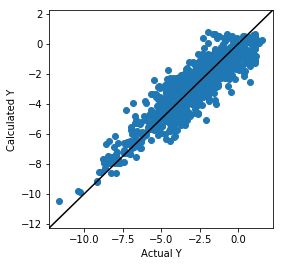

In [12]:
# yy-plot
plt.figure(figsize=figure.figaspect(1))
plt.scatter(y, calculated_y)
YMax = np.max(np.array([np.array(y), calculated_y]))
YMin = np.min(np.array([np.array(y), calculated_y]))
plt.plot([YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)],
         [YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)], 'k-')
plt.ylim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlabel('Actual Y')
plt.ylabel('Calculated Y')
plt.show()


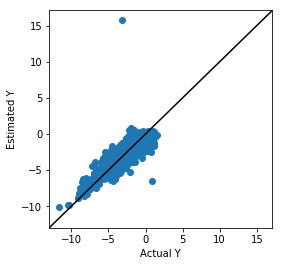

In [13]:
plt.figure(figsize=figure.figaspect(1))

plt.scatter(y, estimated_y)

YMax = np.max(np.array([np.array(y), estimated_y]))
YMin = np.min(np.array([np.array(y), estimated_y]))
plt.plot([YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)],
         [YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)], 'k-')

plt.ylim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlabel('Actual Y')
plt.ylabel('Estimated Y')
plt.show()


In [14]:
# standard regression coefficients
standard_regression_coefficients = regression_model.coef_
standard_regression_coefficients = pd.DataFrame(standard_regression_coefficients)
standard_regression_coefficients.index = X.columns
standard_regression_coefficients.columns = ['standard regression coefficient']
standard_regression_coefficients.to_csv('PLSwCC_standard_regression_coefficients.csv')


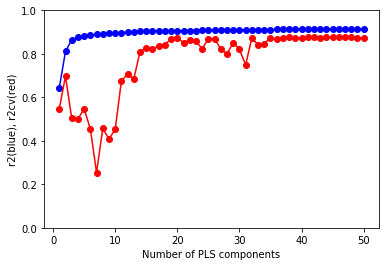

PLSRegression(copy=True, max_iter=500, n_components=46, scale=True, tol=1e-06)

In [15]:
#regression_method_flag == 3:  # Partial Least Squares
pls_components = np.arange(1, min(np.linalg.matrix_rank(autoscaled_X) + 1, max_pls_component_number + 1), 1)
r2all = list()
r2cvall = list()
    
for pls_component in pls_components:
    pls_model_in_cv = PLSRegression(n_components=pls_component)
    pls_model_in_cv.fit(autoscaled_X, autoscaled_y)
        
    calculated_y_in_cv = np.ndarray.flatten(pls_model_in_cv.predict(autoscaled_X))
    estimated_y_in_cv = np.ndarray.flatten(
        model_selection.cross_val_predict(pls_model_in_cv, autoscaled_X, autoscaled_y, cv=fold_number))
        
    if do_autoscaling:
        calculated_y_in_cv = calculated_y_in_cv * y.std(ddof=1) + y.mean()
        estimated_y_in_cv = estimated_y_in_cv * y.std(ddof=1) + y.mean()
        
    r2all.append(float(1 - sum((y - calculated_y_in_cv) ** 2) / sum((y - y.mean()) ** 2)))
    r2cvall.append(float(1 - sum((y - estimated_y_in_cv) ** 2) / sum((y - y.mean()) ** 2)))
    
plt.plot(pls_components, r2all, 'bo-')
plt.plot(pls_components, r2cvall, 'ro-')
plt.ylim(0, 1)
plt.xlabel('Number of PLS components')
plt.ylabel('r2(blue), r2cv(red)')
plt.show()

optimal_pls_component_number = np.where(r2cvall == np.max(r2cvall))
optimal_pls_component_number = optimal_pls_component_number[0][0] + 1
regression_model = PLSRegression(n_components=optimal_pls_component_number)

regression_model.fit(autoscaled_X, autoscaled_y)



In [16]:
# calculate y
calculated_y = np.ndarray.flatten(regression_model.predict(autoscaled_X))
estimated_y = np.ndarray.flatten(
    model_selection.cross_val_predict(regression_model, autoscaled_X, autoscaled_y, cv=fold_number))

if do_autoscaling:
    calculated_y = calculated_y * y.std(ddof=1) + y.mean()
    estimated_y = estimated_y * y.std(ddof=1) + y.mean()

# r2
print('r2: {0}'.format(float(1 - sum((y - calculated_y) ** 2) / sum((y - y.mean()) ** 2))))

r2: 0.9135670864965596


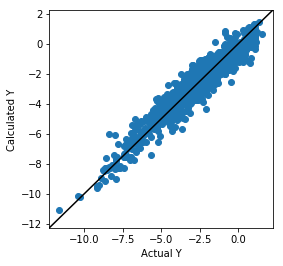

In [17]:
# yy-plot
plt.figure(figsize=figure.figaspect(1))
plt.scatter(y, calculated_y)
YMax = np.max(np.array([np.array(y), calculated_y]))
YMin = np.min(np.array([np.array(y), calculated_y]))
plt.plot([YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)],
         [YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)], 'k-')
plt.ylim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlabel('Actual Y')
plt.ylabel('Calculated Y')
plt.show()


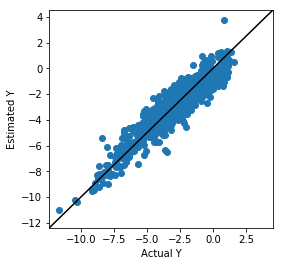

In [18]:
plt.figure(figsize=figure.figaspect(1))

plt.scatter(y, estimated_y)

YMax = np.max(np.array([np.array(y), estimated_y]))
YMin = np.min(np.array([np.array(y), estimated_y]))
plt.plot([YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)],
         [YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin)], 'k-')

plt.ylim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlim(YMin - 0.05 * (YMax - YMin), YMax + 0.05 * (YMax - YMin))
plt.xlabel('Actual Y')
plt.ylabel('Estimated Y')
plt.show()


In [19]:
# standard regression coefficients
standard_regression_coefficients = regression_model.coef_
standard_regression_coefficients = pd.DataFrame(standard_regression_coefficients)
standard_regression_coefficients.index = X.columns
standard_regression_coefficients.columns = ['standard regression coefficient']
standard_regression_coefficients.to_csv('PLS_standard_regression_coefficients.csv')


In [34]:
# ViP (Variable Importance in the Projection) 
model = regression_model

t = model.x_scores_
w = model.x_weights_
q = model.y_loadings_

m, p = autoscaled_X.shape
_, h = t.shape

vips = np.zeros((p,))

s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
total_s = np.sum(s)

for i in range(p):
    weight = np.array([ (w[i,j] / np.linalg.norm(w[:,j]))**2 for j in range(h) ])
    vips[i] = np.sqrt(p*(s.T @ weight)/total_s)

vips_selected_list=[]
vips_series = pd.Series(vips, index=autoscaled_X.columns)
vips_series.to_csv('Variable Importance in the Projecttion.csv')
#VIPが１以上のものを抽出する．
vips_selected = vips_series[vips_series >= 1.0]
vips_selected_list = vips_selected.index
len(vips_selected_list), p

(39, 90)